In [11]:
import pandas as pd

# Load the datasets
df1 = pd.read_csv('/Users/katherineridley/Projects/PlaqueStack/combined.csv')
df2 = pd.read_csv('/Users/katherineridley/Projects/PlaqueStack/OC_6E10/overall__6E10_combined.csv')

print(df1.columns)

print(df2.columns)


# Define identifier columns to exclude from renaming and numeric operations
identifier_cols = ['Genotype', 'image_name']  # Add other identifier columns as needed

df1['Genotype'] = df1['Genotype'].replace({
    'APPPS1': 'APP-WT',
    'APPPS1xFIRE': 'APP-FIRE'
})

# Rename columns in df2, excluding identifier columns
rename_dict = {col: col + '_6e10' for col in df2.columns if col not in identifier_cols}
df2.rename(columns=rename_dict, inplace=True)

# Concatenate the datasets
combined_df = pd.concat([df1, df2], axis=0, ignore_index=True)

# Ensure 'genotype' is present
if 'Genotype' not in combined_df.columns:
    raise ValueError("The 'genotype' column must be present in both datasets.")

# Identify numeric columns to fill
numeric_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in identifier_cols]

# Fill missing numeric values with median per genotype
#combined_df[numeric_cols] = combined_df.groupby('Genotype')[numeric_cols].transform(lambda x: x.fillna(x.median()))

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
combined_df_imputed = imputer.fit_transform(combined_df[numeric_cols])
combined_df[numeric_cols] = combined_df_imputed

#combined_df_imputed to csv

combined_df_imputed = pd.DataFrame(combined_df_imputed, columns=numeric_cols)

# Save the combined dataset
combined_df_imputed.to_csv('/Users/katherineridley/Projects/PlaqueStack/combined_ocm046e10.csv', index=False)

print("Combined dataset saved.")
print(combined_df_imputed)


Index(['area_oc', 'extent_oc', 'centroid_oc', 'surface_area_oc',
       'complexity_oc', 'sphericity_oc', 'major_axis_length_oc',
       'minor_axis_length_oc', 'bbox_oc', 'solidity_oc', 'image_name',
       'region_oc', 'subregion_oc', 'area_m04', 'extent_m04', 'centroid_m04',
       'surface_area_m04', 'complexity_m04', 'sphericity_m04',
       'major_axis_length_m04', 'minor_axis_length_m04', 'bbox_m04',
       'solidity_m04', 'Genotype', 'region_enc', 'cortex_enc', 'hip_enc',
       'volume_ratio'],
      dtype='object')
Index(['area', 'extent', 'centroid', 'surface_area', 'complexity',
       'sphericity', 'major_axis_length', 'minor_axis_length', 'bbox',
       'solidity', 'Genotype', 'image_name'],
      dtype='object')
Combined dataset saved.
           area_oc  extent_oc  surface_area_oc  complexity_oc  sphericity_oc  \
0     49708.000000   0.108344      5550.926393       8.954902       1.177794   
1    211843.000000   0.060366     20012.084730      10.585754       0.858752   

In [13]:
#6E10 and oc combined data with suffix

import pandas as pd

oc_combined = pd.read_csv('/Users/katherineridley/Projects/PlaqueStack/OC_6E10/overall_oc_combined.csv')
_6E10_combined = pd.read_csv('/Users/katherineridley/Projects/PlaqueStack/OC_6E10/overall__6E10_combined.csv')

#oc combined drop last character from image name

oc_combined['image_name'] = oc_combined['image_name'].str[:-1]


print(oc_combined['image_name'].iloc[0])

#combine on genotype and image name

combined = pd.merge(oc_combined, _6E10_combined, on=['image_name'], suffixes=('_oc', '_6E10'))

print(combined)

#save combined

combined.to_csv('/Users/katherineridley/Projects/PlaqueStack/OC_6E10/combined.csv', index=False)


A_2_DAPI_OC_6E10_GFAP_L23_P+_150724 - DAPI_OC_6E10_GFAP.lif
     area_oc  extent_oc                                        centroid_oc  \
0    33873.0   0.228995  (2.4901839222979953, 192.45614501225165, 198.7...   
1    16530.0   0.069643  (5.590139140955838, 200.28560193587415, 215.92...   
2    68817.0   0.155966  (3.0206634988447623, 212.67239199616373, 208.1...   
3    71120.0   0.185522  (4.111811023622047, 193.56996625421823, 211.72...   
4    57392.0   0.089503  (5.302690270420965, 199.33624895455813, 190.19...   
5    34569.0   0.147776  (2.6331105904133763, 193.09777546356563, 207.9...   
6    15423.0   0.233523  (8.009725734292939, 197.94028399144136, 218.71...   
7    34526.0   0.100953  (26.25114406534206, 195.3840873544575, 222.095...   
8    37636.0   0.123242  (4.054761398660856, 196.8879264533957, 193.945...   
9    53102.0   0.086666  (5.706564724492486, 197.287484463862, 210.3542...   
10   69929.0   0.104963  (5.1672410587882, 210.2446481431166, 209.33358...   
11  

Index(['area_oc', 'extent_oc', 'centroid_oc', 'surface_area_oc',
       'complexity_oc', 'sphericity_oc', 'major_axis_length_oc',
       'minor_axis_length_oc', 'bbox_oc', 'solidity_oc', 'image_name',
       'area_6e10', 'extent_6e10', 'centroid_6e10', 'surface_area_6e10',
       'complexity_6e10', 'sphericity_6e10', 'major_axis_length_6e10',
       'minor_axis_length_6e10', 'bbox_6e10', 'solidity_6e10', 'Genotype'],
      dtype='object')
Index(['area_oc', 'extent_oc', 'centroid_oc', 'surface_area_oc',
       'complexity_oc', 'sphericity_oc', 'major_axis_length_oc',
       'minor_axis_length_oc', 'bbox_oc', 'solidity_oc', 'image_name',
       'area_6e10', 'extent_6e10', 'centroid_6e10', 'surface_area_6e10',
       'complexity_6e10', 'sphericity_6e10', 'major_axis_length_6e10',
       'minor_axis_length_6e10', 'bbox_6e10', 'solidity_6e10', 'Genotype'],
      dtype='object')
Accuracy:  0.9444444444444444
Specificity:  0.96875
Sensitivity:  0.9090909090909091


[Text(0.7142857142857143, 0.9285714285714286, 'area_oc <= 111989.5\nentropy = 0.968\nsamples = 43\nvalue = [26, 17]\nclass = APP-WT'),
 Text(0.5714285714285714, 0.7857142857142857, 'minor_axis_length_oc <= 7.514\nentropy = 0.787\nsamples = 34\nvalue = [26, 8]\nclass = APP-WT'),
 Text(0.42857142857142855, 0.6428571428571429, 'surface_area_6e10 <= 1462.665\nentropy = 0.959\nsamples = 21\nvalue = [13, 8]\nclass = APP-WT'),
 Text(0.2857142857142857, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = APP-FIRE'),
 Text(0.5714285714285714, 0.5, 'solidity_oc <= 0.301\nentropy = 0.9\nsamples = 19\nvalue = [13, 6]\nclass = APP-WT'),
 Text(0.42857142857142855, 0.35714285714285715, 'solidity_oc <= 0.27\nentropy = 0.994\nsamples = 11\nvalue = [5, 6]\nclass = APP-FIRE'),
 Text(0.2857142857142857, 0.21428571428571427, 'solidity_oc <= 0.21\nentropy = 0.863\nsamples = 7\nvalue = [5, 2]\nclass = APP-WT'),
 Text(0.14285714285714285, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\

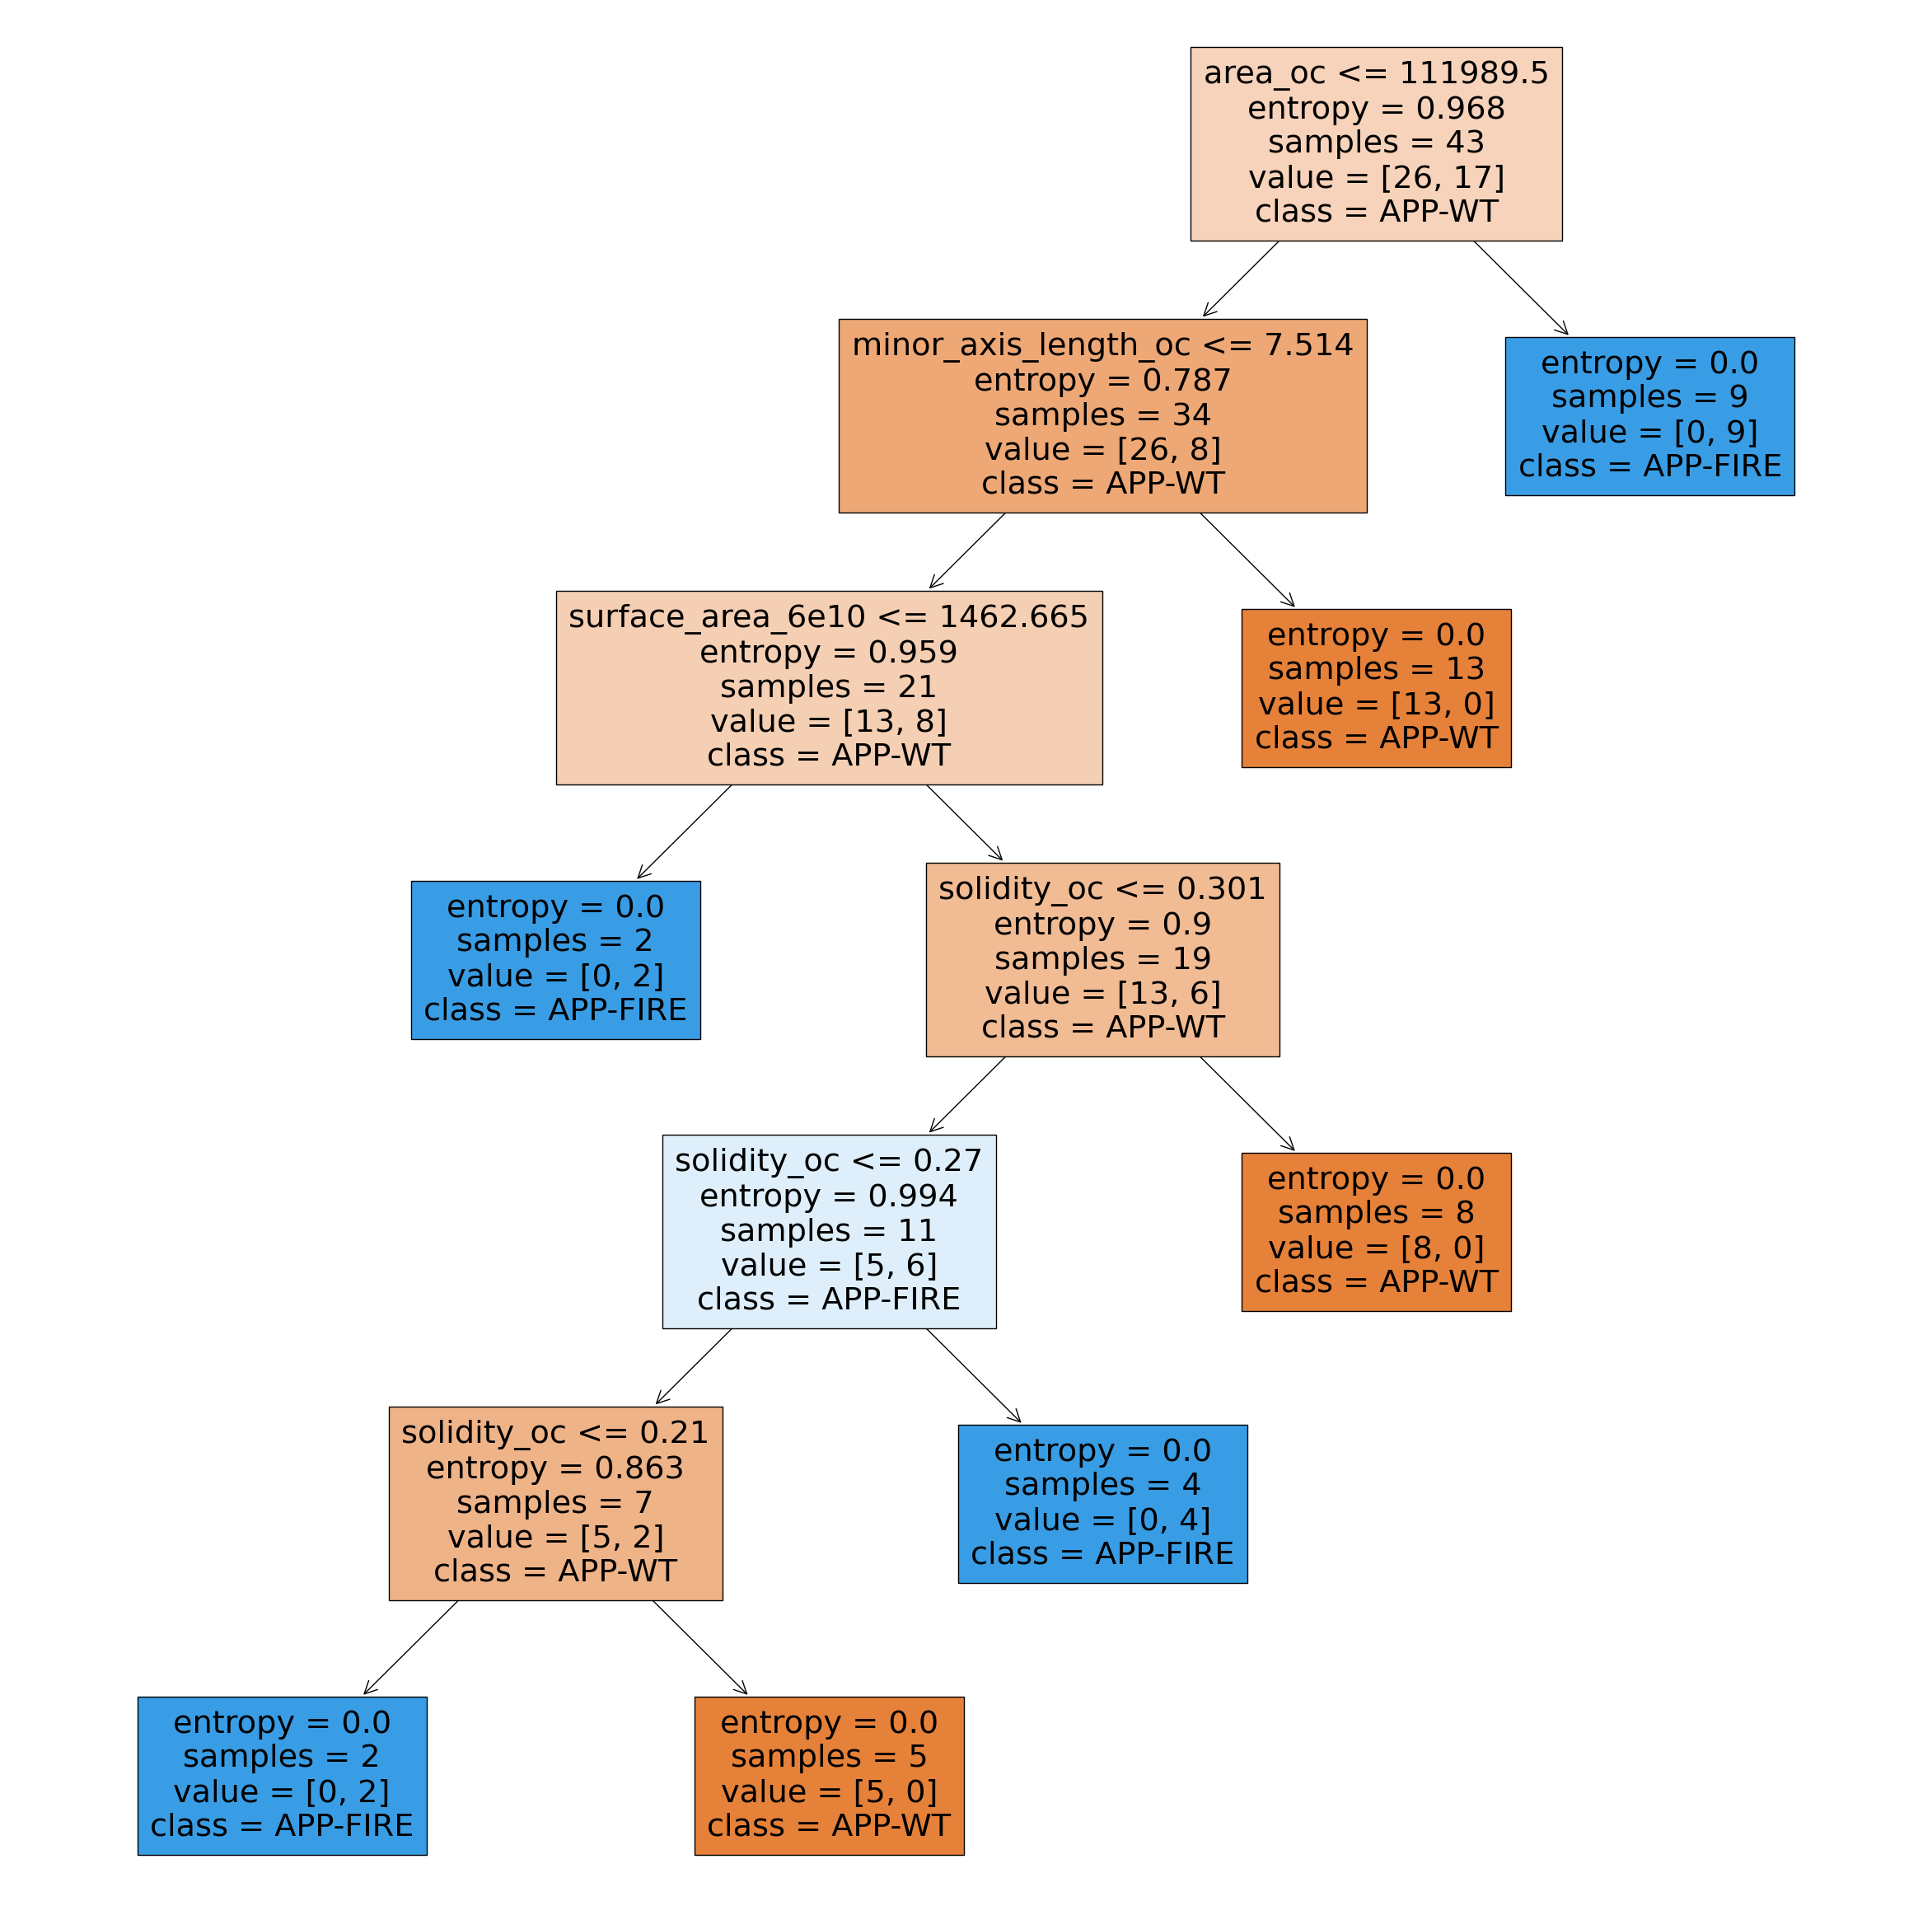

In [54]:
## DT with only OC and 6E10 

#decision tree grid search

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

combined = pd.read_csv('/Users/katherineridley/Projects/PlaqueStack/OC_6E10/combined.csv')
print(combined.columns)

print(combined.columns)
features = combined.drop(['Genotype', 'image_name','centroid_oc', 'bbox_oc', 'centroid_6e10', 'bbox_6e10', 'extent_oc', 'extent_6e10', 'complexity_oc', 'complexity_6e10'], axis=1) # Dropping non-numeric and target columns

labels = combined['Genotype']

#encode genotype labels to 0 and 1

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

labels = le.fit_transform(labels)


# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# Define the grid

'''print("Decision Tree Grid Search"
      
        "=========================")

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 4, 6, 8, 10, 12, 14, 16],
    'min_samples_split': [2, 5, 10, 12, 20],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Initialize the classifier

dt = DecisionTreeClassifier()

# Initialize GridSearchCV

grid_search = GridSearchCV(dt, param_grid, cv=3, scoring='accuracy')

# Fit the model

grid_search.fit(X_train, y_train)

# Get the best parameters

grid_search.best_params_

# Get the best estimator

best_dt = grid_search.best_estimator_

# Get the best score

grid_search.best_score_

# Get the best model

y_pred = best_dt.predict(X_test)

# Compute accuracy

accuracy_score(y_test, y_pred)

# Compute confusion matrix

confusion_matrix(y_test, y_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=np.unique(labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

# Print the best parameters

print(grid_search.best_params_)

# Print the best estimator

print(grid_search.best_estimator_)


# Print the best score

print(grid_search.best_score_)

# Print the best model

print(best_dt)

import joblib

joblib.dump(best_dt, 'best_dt_combined.pkl')

# Initialize the classifier'''

best_dt = DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=1, min_samples_split=2)

best_dt.fit(X_train, y_train)

oc_pred = best_dt.predict(features)

# Compute accuracy

accuracy_score(labels, oc_pred)

# Compute confusion matrix

confusion_matrix(labels, oc_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(labels, oc_pred, labels=np.unique(labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

print("Accuracy: ", accuracy_score(labels, oc_pred))

print("Specificity: ", specificity)

print("Sensitivity: ", sensitivity)

#print(features)

#plot decision tree

from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))

plot_tree(best_dt, filled=True, feature_names=features.columns, class_names=['APP-WT', 'APP-FIRE'])




Index(['area_oc', 'extent_oc', 'centroid_oc', 'surface_area_oc',
       'complexity_oc', 'sphericity_oc', 'major_axis_length_oc',
       'minor_axis_length_oc', 'bbox_oc', 'solidity_oc', 'image_name',
       'area_m04', 'extent_m04', 'centroid_m04', 'surface_area_m04',
       'complexity_m04', 'sphericity_m04', 'major_axis_length_m04',
       'minor_axis_length_m04', 'bbox_m04', 'solidity_m04', 'Genotype',
       'volume_ratio', 'area_6e10', 'extent_6e10', 'centroid_6e10',
       'surface_area_6e10', 'complexity_6e10', 'sphericity_6e10',
       'major_axis_length_6e10', 'minor_axis_length_6e10', 'bbox_6e10',
       'solidity_6e10'],
      dtype='object')
Index(['area_oc', 'extent_oc', 'centroid_oc', 'surface_area_oc',
       'complexity_oc', 'sphericity_oc', 'major_axis_length_oc',
       'minor_axis_length_oc', 'bbox_oc', 'solidity_oc', 'image_name',
       'area_m04', 'extent_m04', 'centroid_m04', 'surface_area_m04',
       'complexity_m04', 'sphericity_m04', 'major_axis_length_m04',

[Text(0.4444444444444444, 0.875, 'area_6e10 <= 42226.0\nentropy = 0.997\nsamples = 111\nvalue = [59, 52]\nclass = APP-WT'),
 Text(0.2222222222222222, 0.625, 'solidity_oc <= 0.186\nentropy = 0.397\nsamples = 51\nvalue = [4, 47]\nclass = APP-FIRE'),
 Text(0.1111111111111111, 0.375, 'entropy = 0.0\nsamples = 44\nvalue = [0, 44]\nclass = APP-FIRE'),
 Text(0.3333333333333333, 0.375, 'minor_axis_length_6e10 <= 13.698\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]\nclass = APP-WT'),
 Text(0.2222222222222222, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = APP-WT'),
 Text(0.4444444444444444, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = APP-FIRE'),
 Text(0.6666666666666666, 0.625, 'major_axis_length_6e10 <= 256.932\nentropy = 0.414\nsamples = 60\nvalue = [55, 5]\nclass = APP-WT'),
 Text(0.5555555555555556, 0.375, 'entropy = 0.0\nsamples = 52\nvalue = [52, 0]\nclass = APP-WT'),
 Text(0.7777777777777778, 0.375, 'surface_area_m04 <= 6403.573\nentropy = 0.954\nsamples = 8\

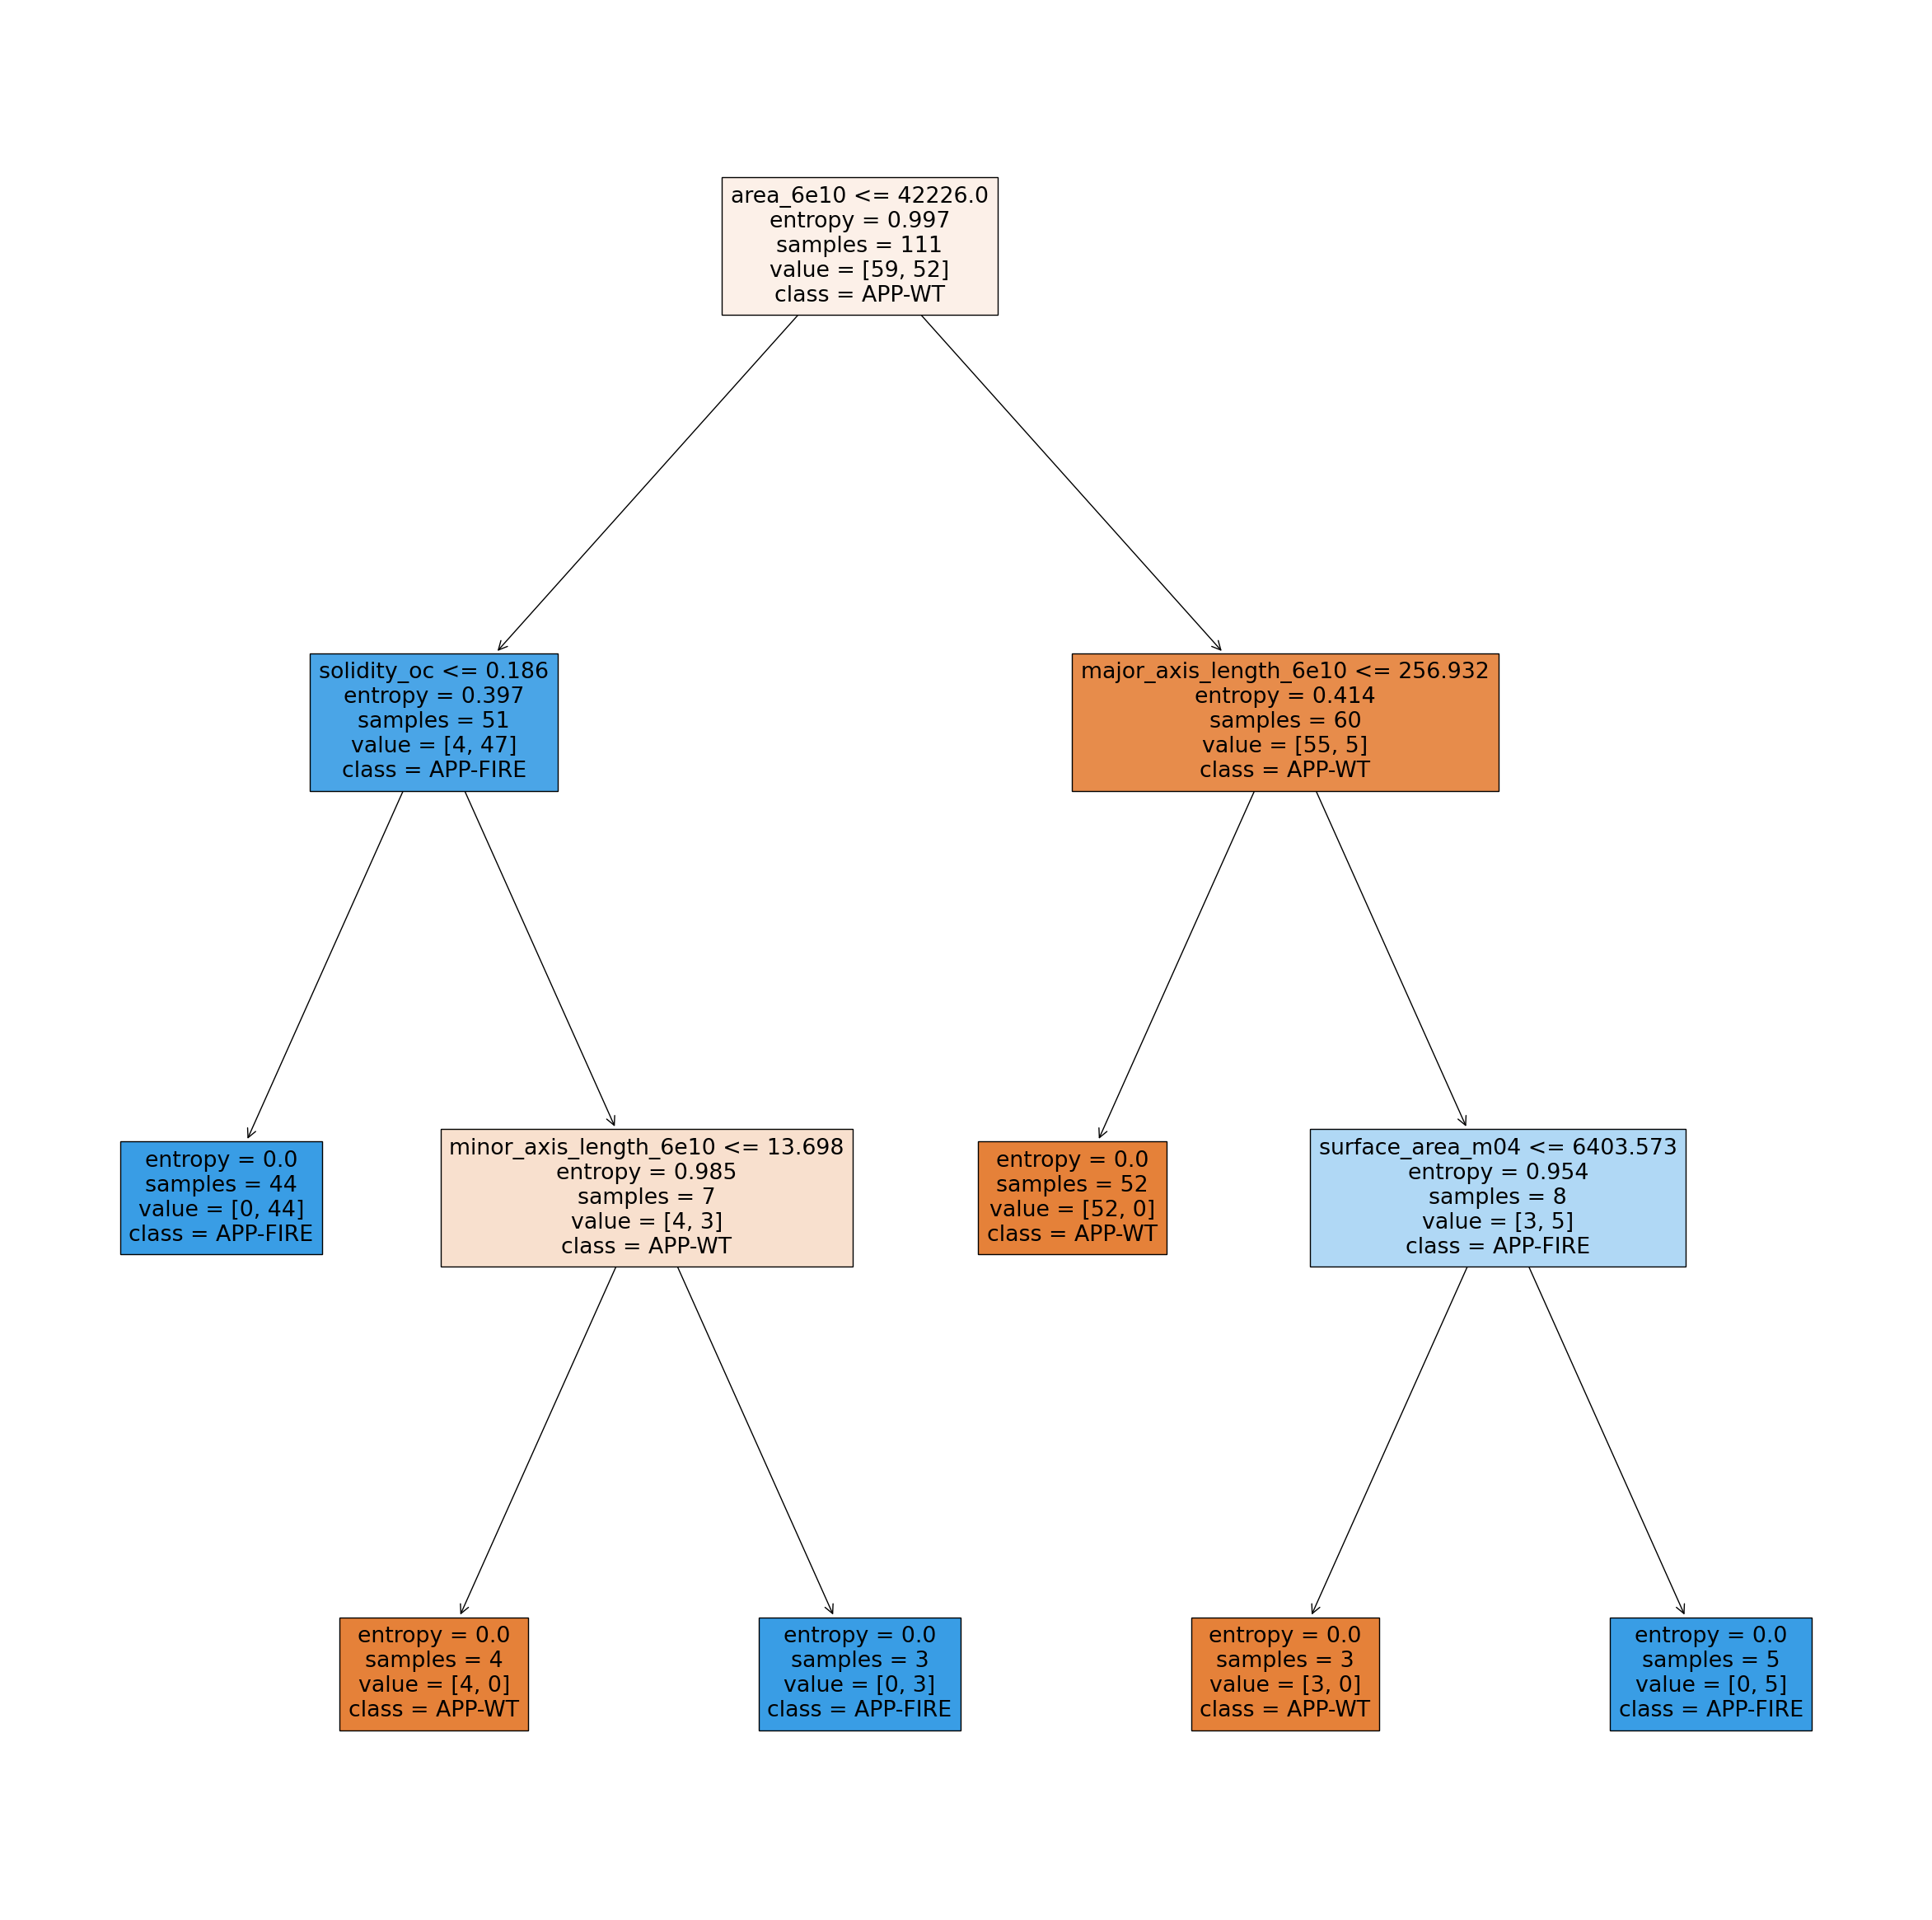

In [29]:
## DT with only OC and 6E10 

#decision tree grid search

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

combined = pd.read_csv('/Users/katherineridley/Projects/PlaqueStack/combined_ocm046e10.csv')
print(combined.columns)

print(combined.columns)
features = combined.drop(['Genotype', 'image_name','centroid_oc', 'bbox_oc', 'centroid_6e10', 'bbox_6e10', 'extent_oc', 'extent_6e10', 'complexity_oc', 'complexity_6e10', 'complexity_m04', 'bbox_m04', 'extent_m04', 'centroid_m04'], axis=1) # Dropping non-numeric and target columns

labels = combined['Genotype']

#encode genotype labels to 0 and 1

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

labels = le.fit_transform(labels)


# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# Define the grid

'''print("Decision Tree Grid Search"
      
        "=========================")

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 4, 6, 8, 10, 12, 14, 16],
    'min_samples_split': [2, 5, 10, 12, 20],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Initialize the classifier

dt = DecisionTreeClassifier()

# Initialize GridSearchCV

grid_search = GridSearchCV(dt, param_grid, cv=3, scoring='accuracy')

# Fit the model

grid_search.fit(X_train, y_train)

# Get the best parameters

grid_search.best_params_

# Get the best estimator

best_dt = grid_search.best_estimator_

# Get the best score

grid_search.best_score_

# Get the best model

y_pred = best_dt.predict(X_test)

# Compute accuracy

accuracy_score(y_test, y_pred)

# Compute confusion matrix

confusion_matrix(y_test, y_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=np.unique(labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

# Print the best parameters

print(grid_search.best_params_)

# Print the best estimator

print(grid_search.best_estimator_)


# Print the best score

print(grid_search.best_score_)

# Print the best model

print(best_dt)

import joblib

joblib.dump(best_dt, 'best_dt_combined.pkl')

# Initialize the classifier'''

best_dt = DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=1, min_samples_split=2)

best_dt.fit(X_train, y_train)

oc_pred = best_dt.predict(features)

# Compute accuracy

accuracy_score(labels, oc_pred)

# Compute confusion matrix

confusion_matrix(labels, oc_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(labels, oc_pred, labels=np.unique(labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

print("Accuracy: ", accuracy_score(labels, oc_pred))

print("Specificity: ", specificity)

print("Sensitivity: ", sensitivity)

#print(features)

#plot decision tree

from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))

plot_tree(best_dt, filled=True, feature_names=features.columns, class_names=['APP-WT', 'APP-FIRE'])




Index(['area', 'extent', 'centroid', 'surface_area', 'complexity',
       'sphericity', 'major_axis_length', 'minor_axis_length', 'bbox',
       'solidity', 'Genotype', 'image_name'],
      dtype='object')
Accuracy:  0.8936170212765957
Specificity:  0.9310344827586207
Sensitivity:  0.8333333333333334


[Text(0.42857142857142855, 0.9166666666666666, 'area <= 38870.5\nentropy = 0.909\nsamples = 37\nvalue = [25, 12]\nclass = APP-WT'),
 Text(0.21428571428571427, 0.75, 'solidity <= 0.293\nentropy = 0.881\nsamples = 10\nvalue = [3, 7]\nclass = APP-FIRE'),
 Text(0.14285714285714285, 0.5833333333333334, 'major_axis_length <= 113.748\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]\nclass = APP-WT'),
 Text(0.07142857142857142, 0.4166666666666667, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = APP-WT'),
 Text(0.21428571428571427, 0.4166666666666667, 'area <= 35378.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = APP-FIRE'),
 Text(0.14285714285714285, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = APP-FIRE'),
 Text(0.2857142857142857, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = APP-WT'),
 Text(0.2857142857142857, 0.5833333333333334, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = APP-FIRE'),
 Text(0.6428571428571429, 0.75, 'solidity <= 0.23\nentropy = 0.

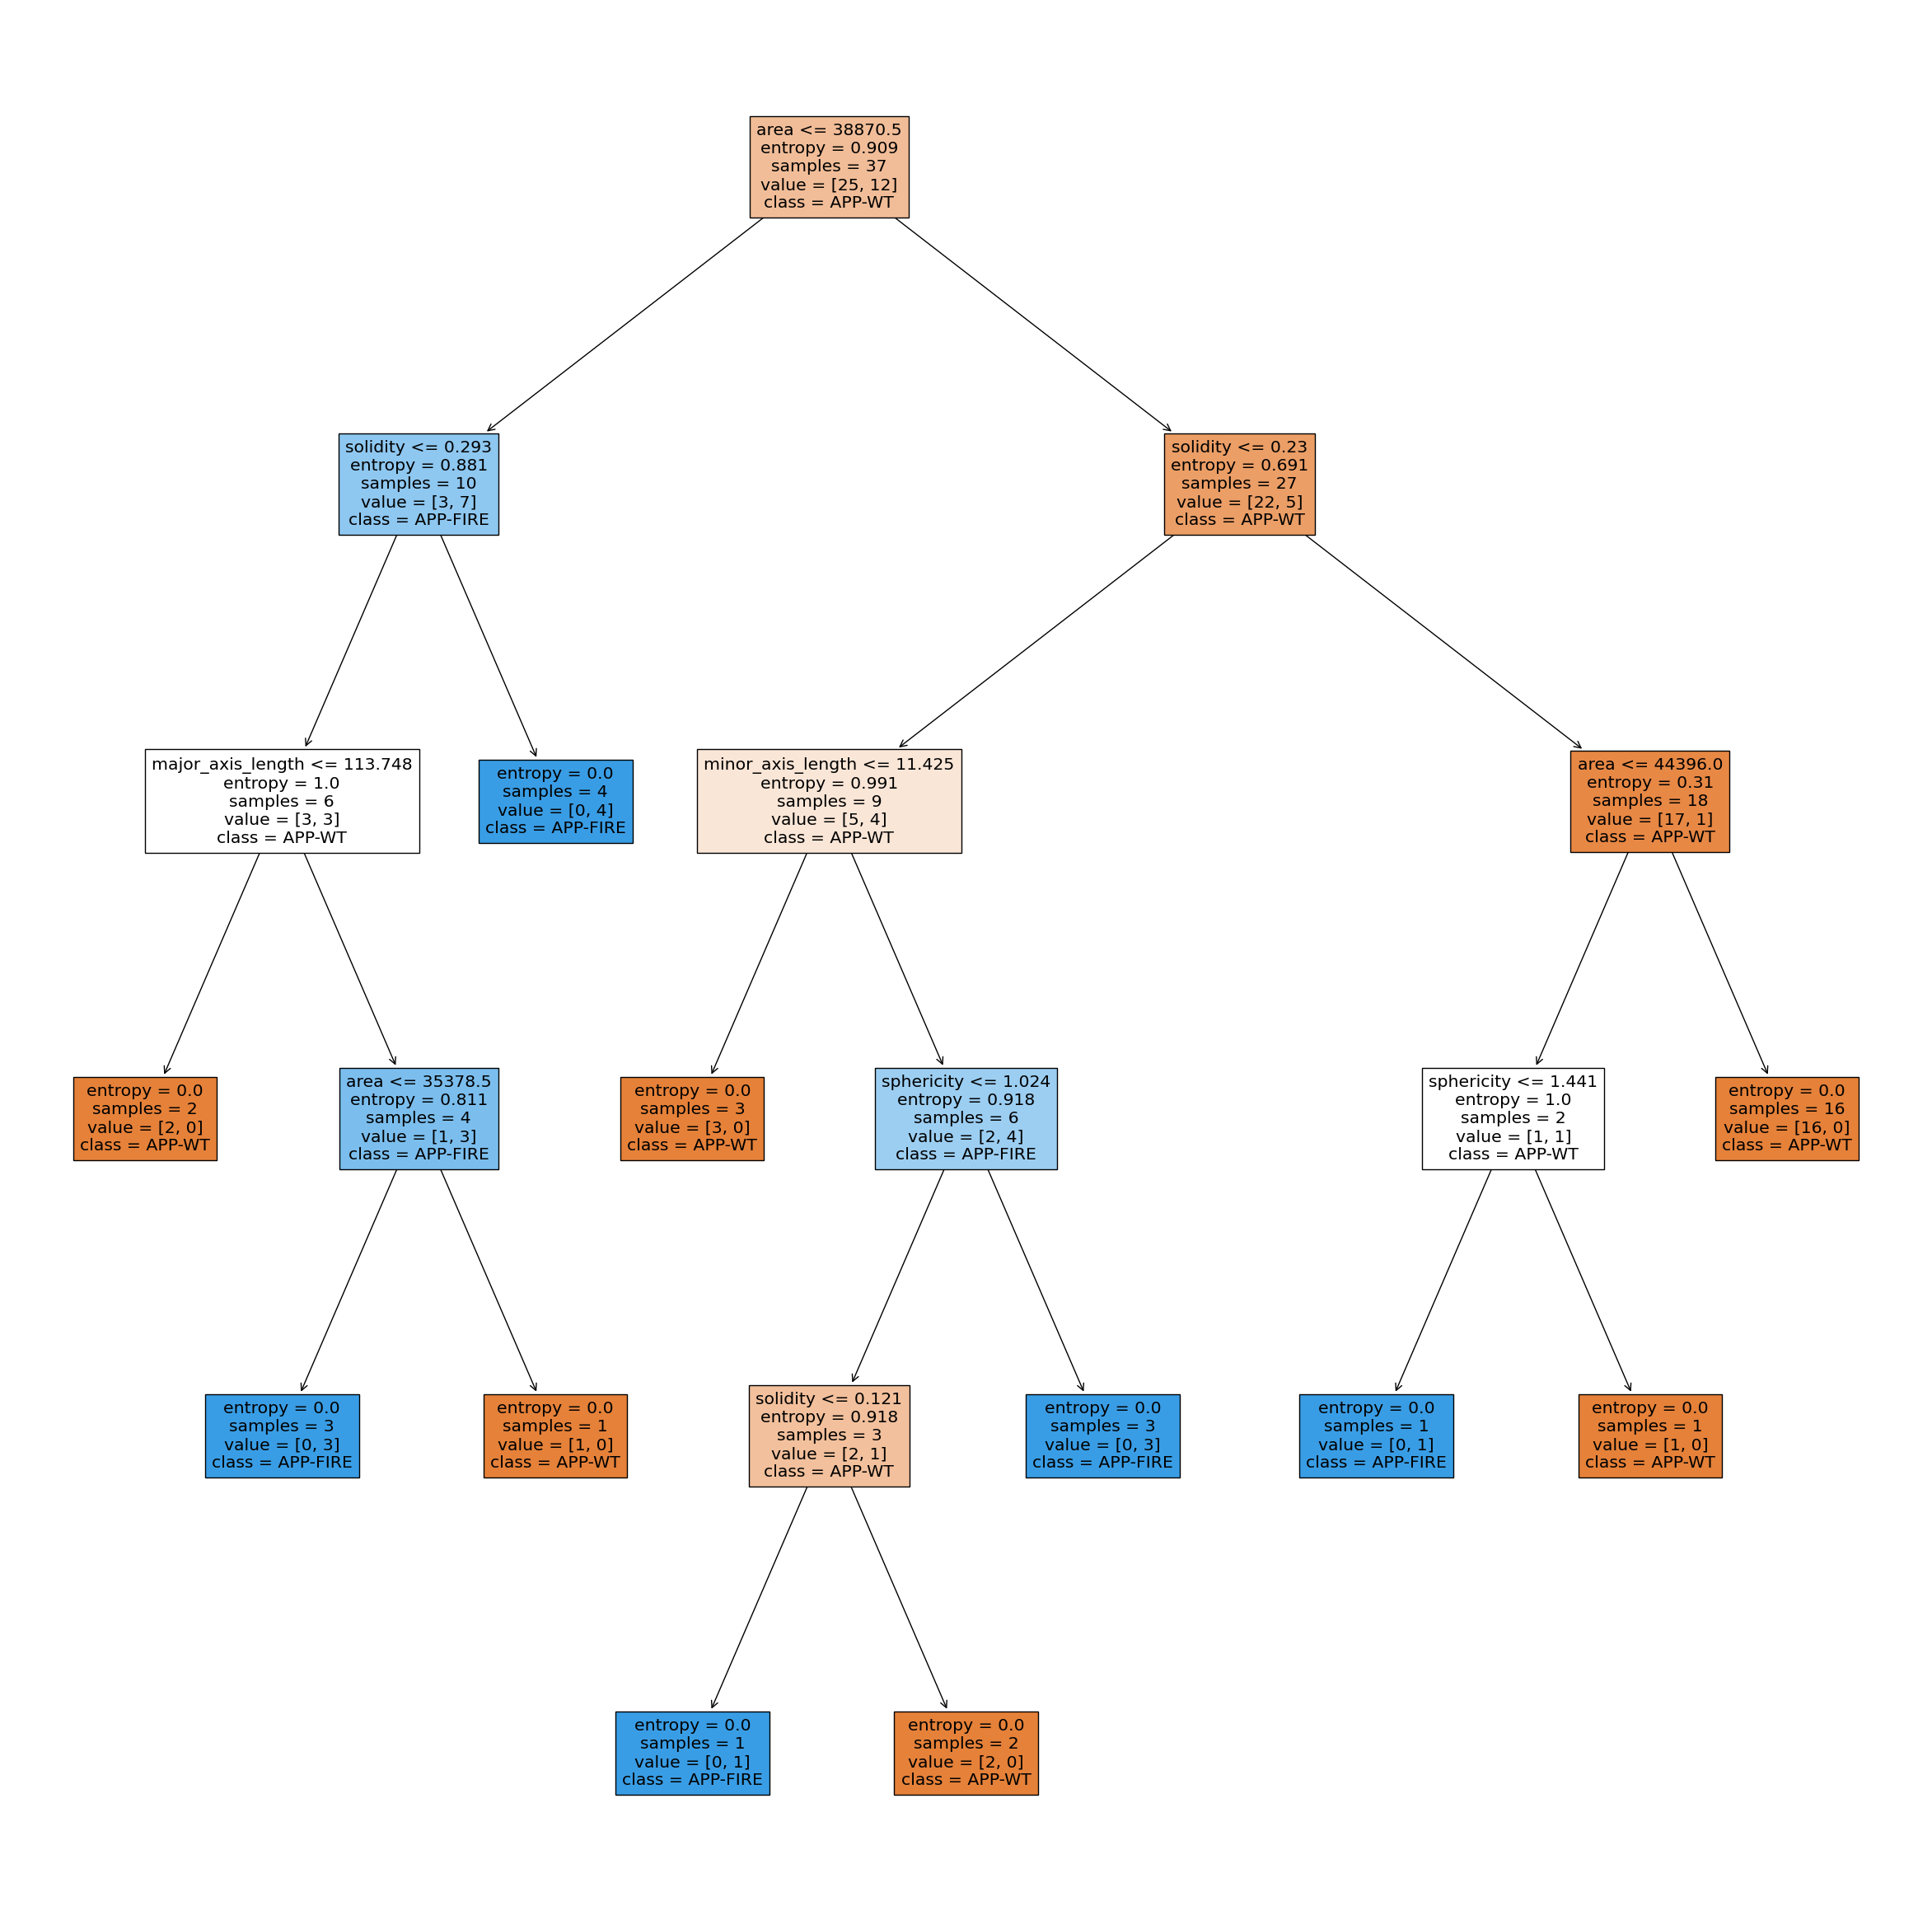

In [34]:
#6E10 alone

#decision tree grid search

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

combined = pd.read_csv('/Users/katherineridley/Projects/PlaqueStack/OC_6E10/overall__6E10_combined.csv')
print(combined.columns)

features = combined.drop(['Genotype', 'image_name','centroid', 'bbox', 'extent', 'complexity'], axis=1) # Dropping non-numeric and target columns

labels = combined['Genotype']

#encode genotype labels to 0 and 1

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

labels = le.fit_transform(labels)


# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# Define the grid

'''print("Decision Tree Grid Search"
      
        "=========================")

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 4, 6, 8, 10, 12, 14, 16],
    'min_samples_split': [2, 5, 10, 12, 20],
    'min_samples_leaf': [1, 2, 3, 4]
}


# Initialize the classifier

dt = DecisionTreeClassifier()

# Initialize GridSearchCV

grid_search = GridSearchCV(dt, param_grid, cv=3, scoring='accuracy')

# Fit the model

grid_search.fit(X_train, y_train)

# Get the best parameters

grid_search.best_params_

# Get the best estimator

best_dt = grid_search.best_estimator_

# Get the best score

grid_search.best_score_

# Get the best model

y_pred = best_dt.predict(X_test)

# Compute accuracy

accuracy_score(y_test, y_pred)

# Compute confusion matrix

confusion_matrix(y_test, y_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=np.unique(labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

# Print the best parameters

print(grid_search.best_params_)

# Print the best estimator

print(grid_search.best_estimator_)


# Print the best score

print(grid_search.best_score_)

# Print the best model

print(best_dt)

import joblib

joblib.dump(best_dt, 'best_dt_combined.pkl')

# Initialize the classifier'''

#dt = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4, min_samples_split=10) 
best_dt = DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=1, min_samples_split=2)
best_dt.fit(X_train, y_train)

oc_pred = best_dt.predict(features)

# Compute accuracy

accuracy_score(labels, oc_pred)

# Compute confusion matrix

confusion_matrix(labels, oc_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(labels, oc_pred, labels=np.unique(labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

print("Accuracy: ", accuracy_score(labels, oc_pred))

print("Specificity: ", specificity)

print("Sensitivity: ", sensitivity)

#print(features)

#plot decision tree

from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))

plot_tree(best_dt, filled=True, feature_names=features.columns, class_names=['APP-WT', 'APP-FIRE'])




Index(['area', 'extent', 'centroid', 'surface_area', 'complexity',
       'sphericity', 'major_axis_length', 'minor_axis_length', 'bbox',
       'solidity', 'Genotype', 'image_name'],
      dtype='object')
Index(['area', 'extent', 'centroid', 'surface_area', 'complexity',
       'sphericity', 'major_axis_length', 'minor_axis_length', 'bbox',
       'solidity', 'Genotype', 'image_name'],
      dtype='object')
Accuracy:  0.9591836734693877
Specificity:  0.9655172413793104
Sensitivity:  0.95


[Text(0.42857142857142855, 0.9285714285714286, 'area <= 106912.0\nentropy = 0.977\nsamples = 39\nvalue = [23, 16]\nclass = APP-WT'),
 Text(0.2857142857142857, 0.7857142857142857, 'solidity <= 0.214\nentropy = 0.857\nsamples = 32\nvalue = [23, 9]\nclass = APP-WT'),
 Text(0.14285714285714285, 0.6428571428571429, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = APP-FIRE'),
 Text(0.42857142857142855, 0.6428571428571429, 'minor_axis_length <= 2.68\nentropy = 0.736\nsamples = 29\nvalue = [23, 6]\nclass = APP-WT'),
 Text(0.2857142857142857, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = APP-FIRE'),
 Text(0.5714285714285714, 0.5, 'sphericity <= 1.729\nentropy = 0.605\nsamples = 27\nvalue = [23, 4]\nclass = APP-WT'),
 Text(0.42857142857142855, 0.35714285714285715, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]\nclass = APP-WT'),
 Text(0.7142857142857143, 0.35714285714285715, 'solidity <= 0.304\nentropy = 0.918\nsamples = 12\nvalue = [8, 4]\nclass = APP-WT'),
 Text(0.57142857142857

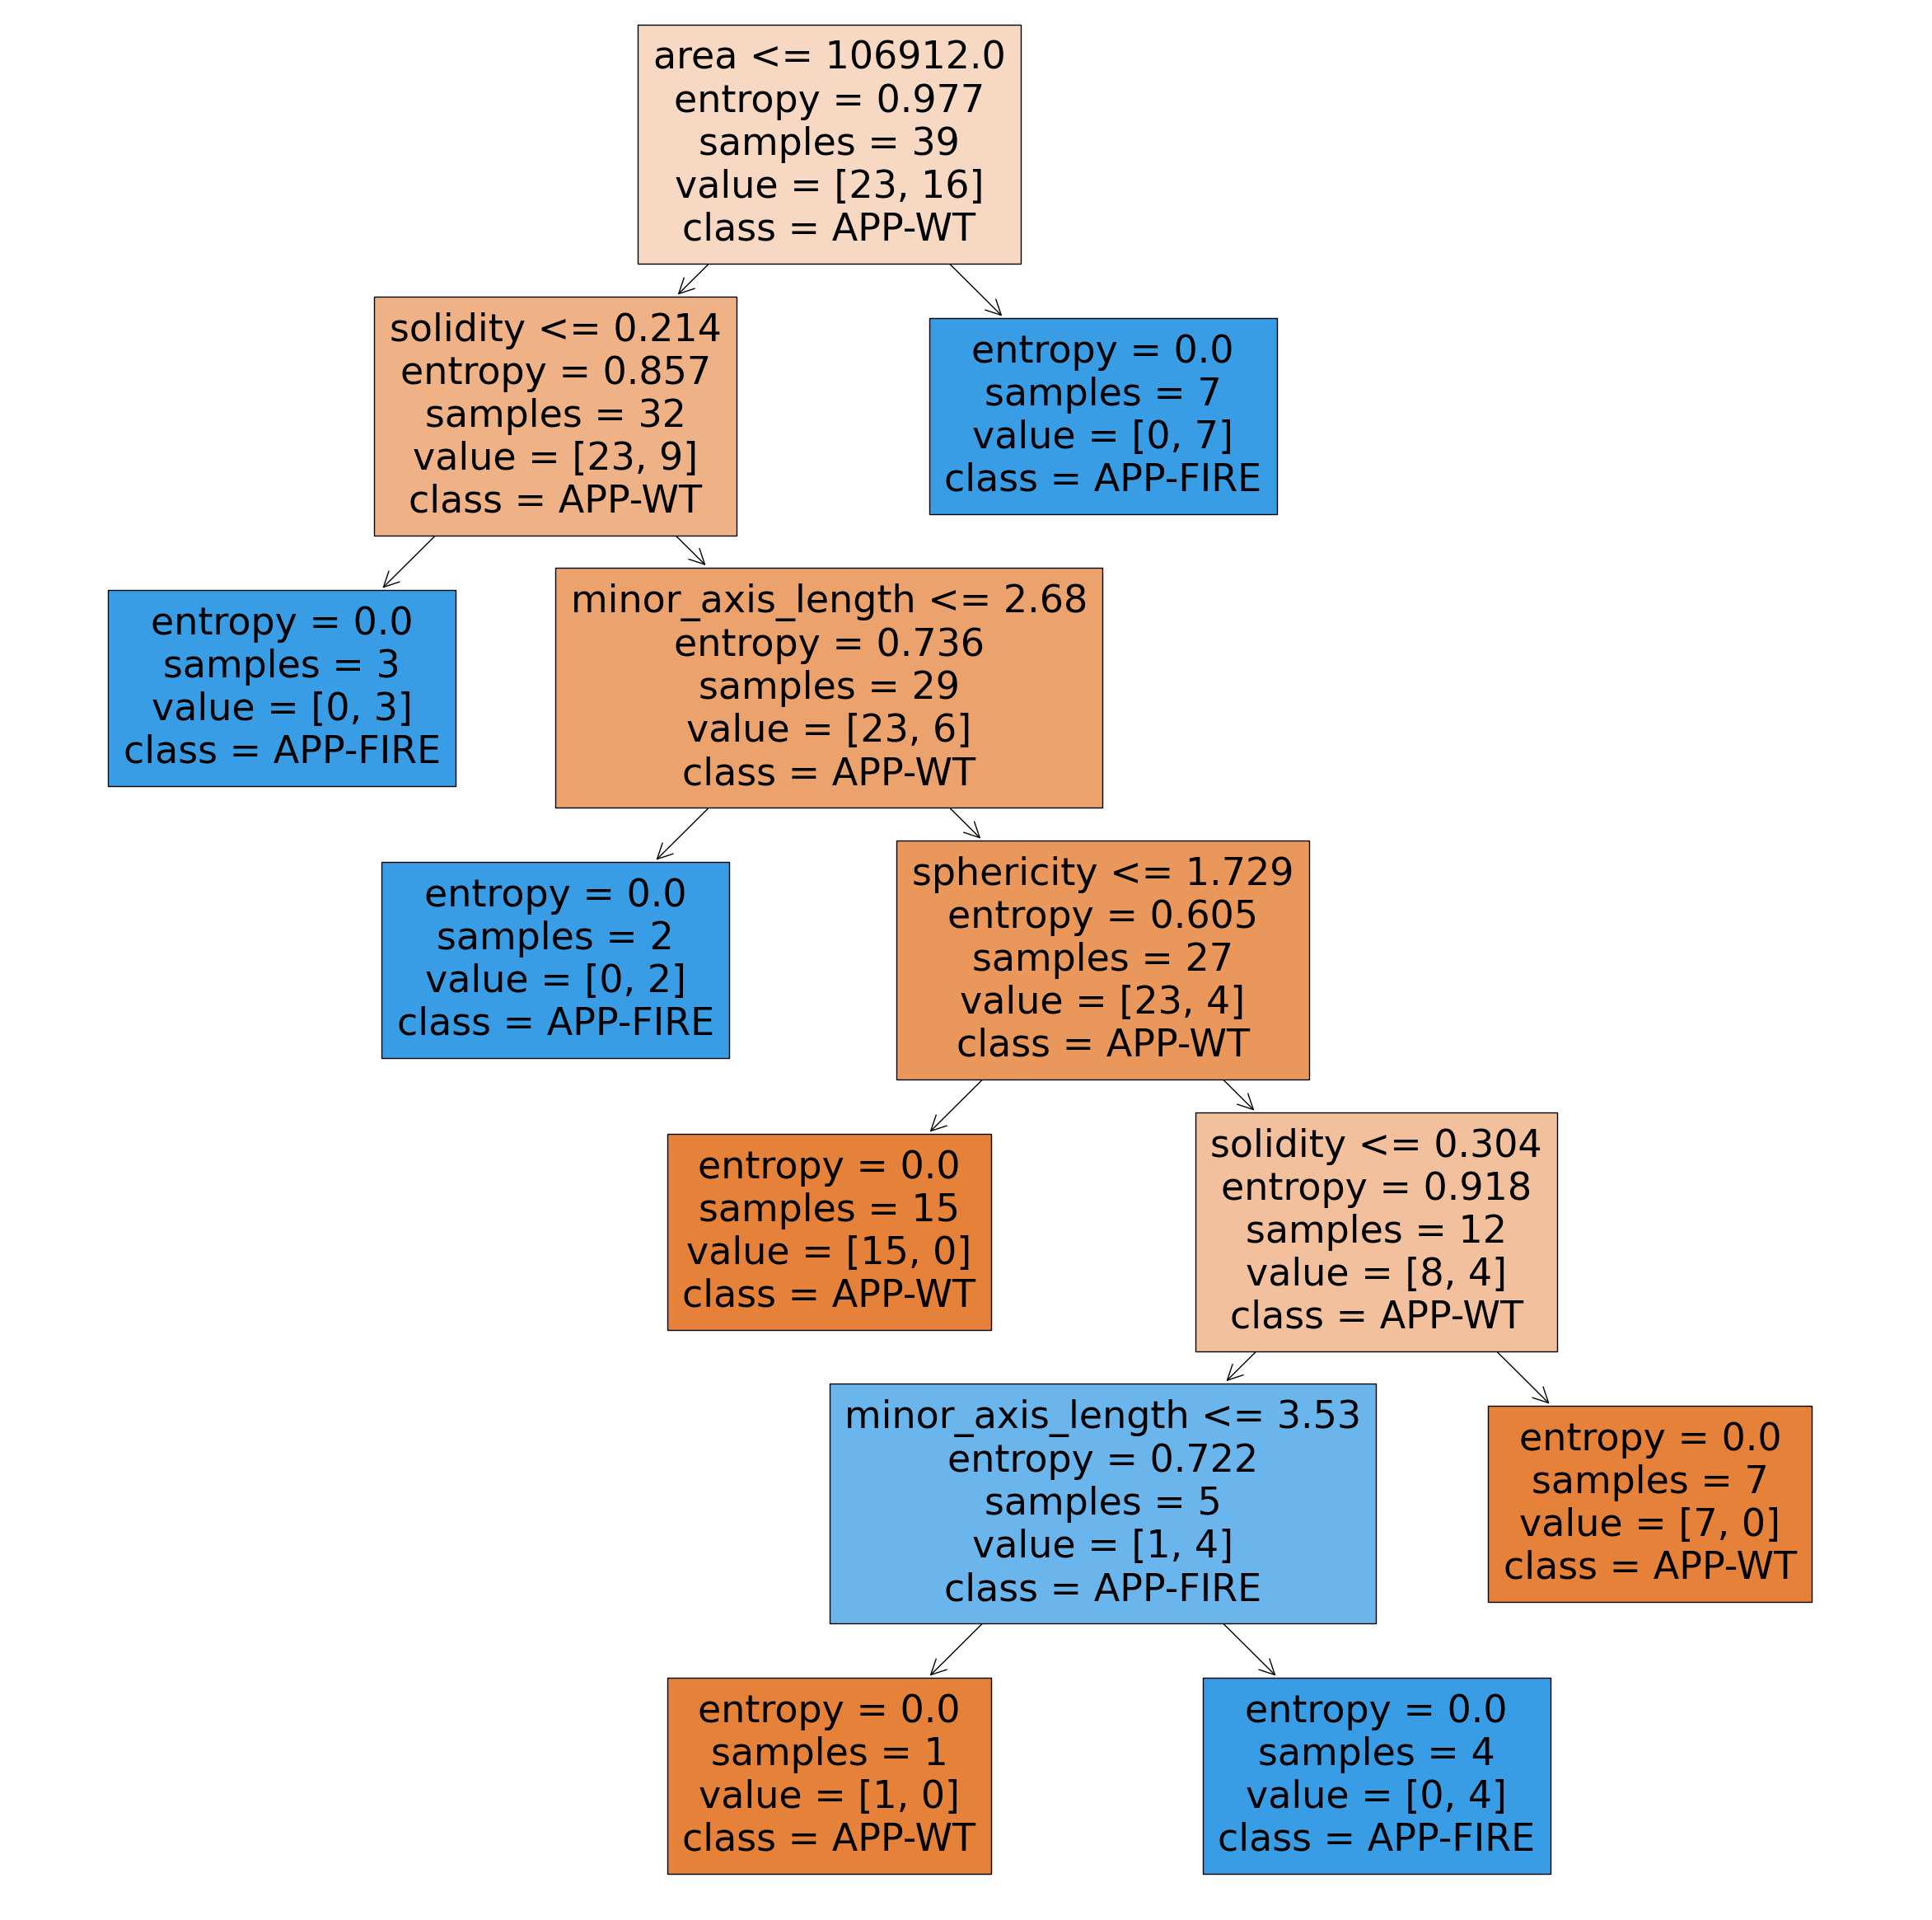

In [43]:
## OC alone

#6E10 alone

#decision tree grid search

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

combined = pd.read_csv('/Users/katherineridley/Projects/PlaqueStack/OC_6E10/overall_oc_combined.csv')
print(combined.columns)

print(combined.columns)
features = combined.drop(['Genotype', 'image_name','centroid', 'bbox', 'extent', 'complexity'], axis=1) # Dropping non-numeric and target columns

labels = combined['Genotype']

#encode genotype labels to 0 and 1

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

labels = le.fit_transform(labels)


# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# Define the grid

'''print("Decision Tree Grid Search"
      
        "=========================")

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 4, 6, 8, 10, 12, 14, 16],
    'min_samples_split': [2, 5, 10, 12, 20],
    'min_samples_leaf': [1, 2, 3, 4]
}


# Initialize the classifier

dt = DecisionTreeClassifier()

# Initialize GridSearchCV

grid_search = GridSearchCV(dt, param_grid, cv=3, scoring='accuracy')

# Fit the model

grid_search.fit(X_train, y_train)

# Get the best parameters

grid_search.best_params_

# Get the best estimator

best_dt = grid_search.best_estimator_

# Get the best score

grid_search.best_score_

# Get the best model

y_pred = best_dt.predict(X_test)

# Compute accuracy

accuracy_score(y_test, y_pred)

# Compute confusion matrix

confusion_matrix(y_test, y_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=np.unique(labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

# Print the best parameters

print(grid_search.best_params_)

# Print the best estimator

print(grid_search.best_estimator_)


# Print the best score

print(grid_search.best_score_)

# Print the best model

print(best_dt)

import joblib

joblib.dump(best_dt, 'best_dt_combined.pkl')

# Initialize the classifier'''

#dt = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4, min_samples_split=10) 
best_dt = DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=1, min_samples_split=2)

best_dt.fit(X_train, y_train)

oc_pred = best_dt.predict(features)

# Compute accuracy

accuracy_score(labels, oc_pred)

# Compute confusion matrix

confusion_matrix(labels, oc_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(labels, oc_pred, labels=np.unique(labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

print("Accuracy: ", accuracy_score(labels, oc_pred))

print("Specificity: ", specificity)

print("Sensitivity: ", sensitivity)

#print(features)

#plot decision tree

from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))

plot_tree(best_dt, filled=True, feature_names=features.columns, class_names=['APP-WT', 'APP-FIRE'])




Index(['area', 'extent', 'centroid', 'surface_area', 'complexity',
       'sphericity', 'major_axis_length', 'minor_axis_length', 'bbox',
       'solidity', 'Genotype', 'image_name'],
      dtype='object')
Index(['area', 'extent', 'centroid', 'surface_area', 'complexity',
       'sphericity', 'major_axis_length', 'minor_axis_length', 'bbox',
       'solidity', 'Genotype', 'image_name'],
      dtype='object')
Accuracy:  0.9130434782608695
Specificity:  0.9545454545454546
Sensitivity:  0.875


[Text(0.6805555555555556, 0.9444444444444444, 'solidity <= 0.38\nentropy = 0.999\nsamples = 73\nvalue = [35, 38]\nclass = APP-FIRE'),
 Text(0.4722222222222222, 0.8333333333333334, 'surface_area <= 14025.96\nentropy = 0.881\nsamples = 40\nvalue = [28, 12]\nclass = APP-WT'),
 Text(0.4166666666666667, 0.7222222222222222, 'major_axis_length <= 162.376\nentropy = 0.946\nsamples = 33\nvalue = [21, 12]\nclass = APP-WT'),
 Text(0.2777777777777778, 0.6111111111111112, 'sphericity <= 1.067\nentropy = 0.702\nsamples = 21\nvalue = [17, 4]\nclass = APP-WT'),
 Text(0.2222222222222222, 0.5, 'solidity <= 0.284\nentropy = 0.946\nsamples = 11\nvalue = [7, 4]\nclass = APP-WT'),
 Text(0.1111111111111111, 0.3888888888888889, 'major_axis_length <= 138.793\nentropy = 0.592\nsamples = 7\nvalue = [6, 1]\nclass = APP-WT'),
 Text(0.05555555555555555, 0.2777777777777778, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = APP-WT'),
 Text(0.16666666666666666, 0.2777777777777778, 'surface_area <= 7428.287\nentropy

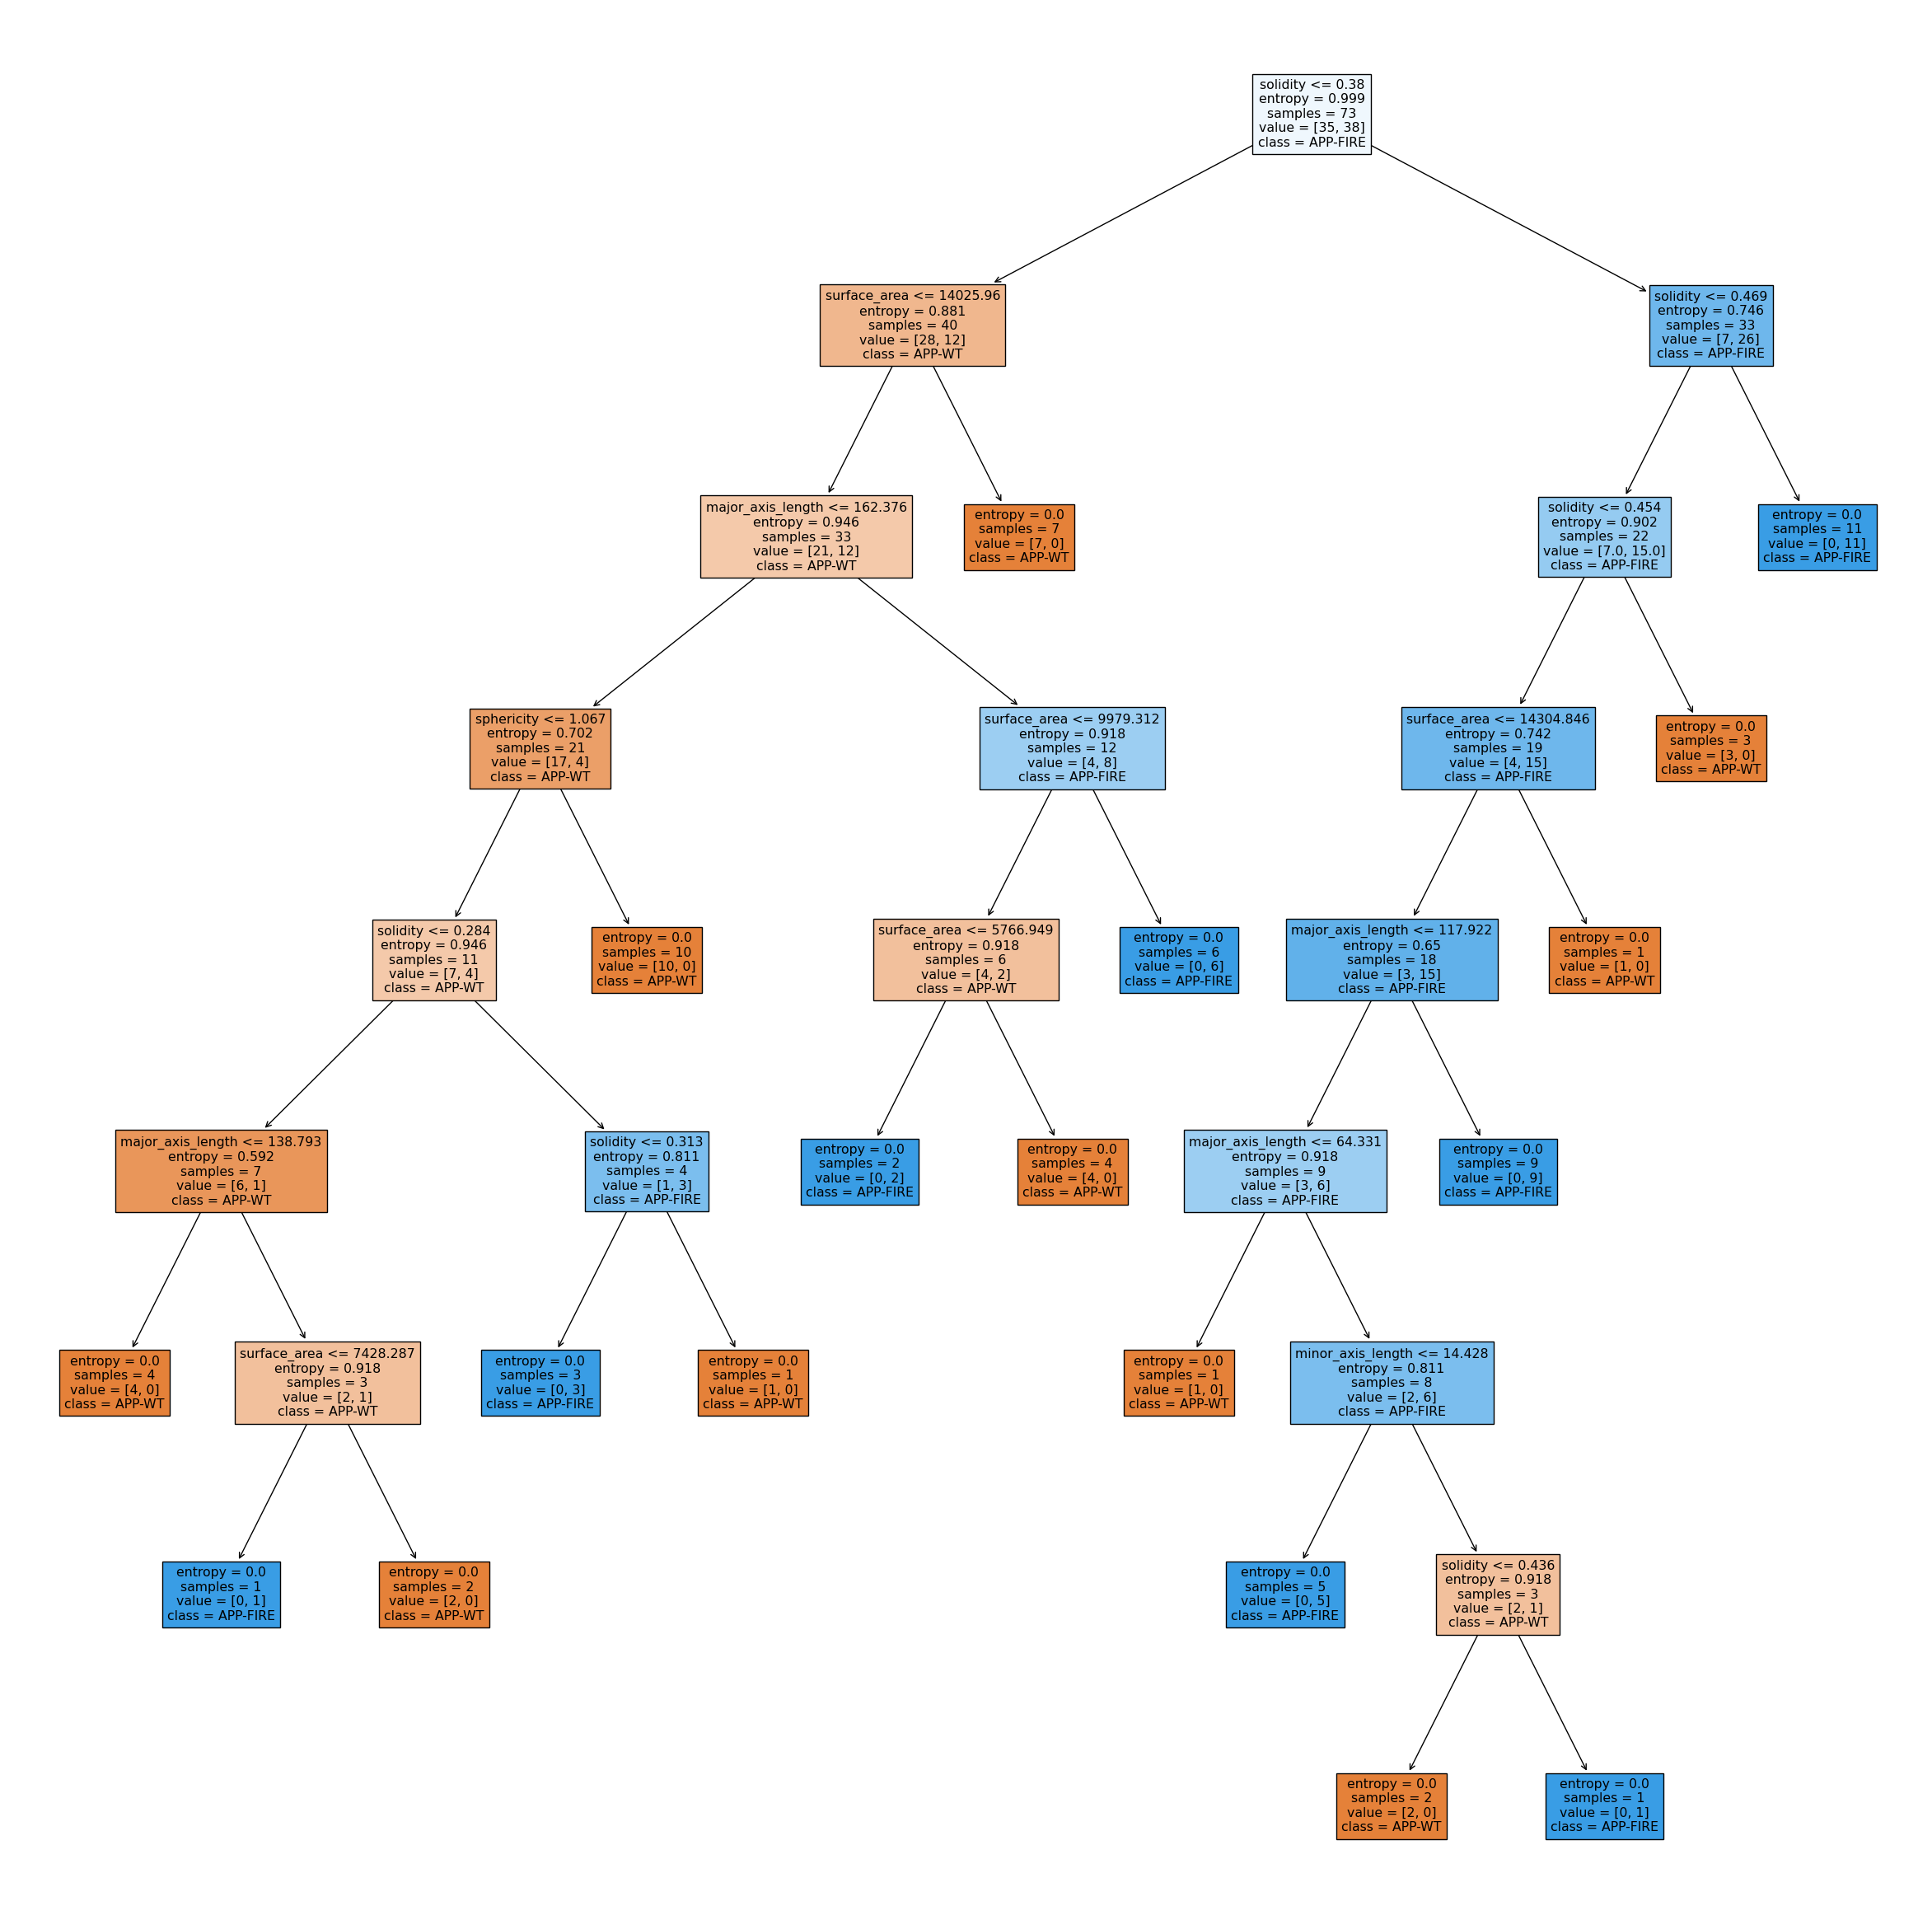

In [49]:
## OC alone

#6E10 alone

#decision tree grid search

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV

combined = pd.read_csv('/Users/katherineridley/Projects/PlaqueStack/overall_m04_combined.csv')
print(combined.columns)

print(combined.columns)
features = combined.drop(['Genotype', 'image_name','centroid', 'bbox', 'extent', 'complexity'], axis=1) # Dropping non-numeric and target columns

labels = combined['Genotype']

#encode genotype labels to 0 and 1

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

labels = le.fit_transform(labels)


# Splitting the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# Define the grid

'''print("Decision Tree Grid Search"
      
        "=========================")

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 1, 2, 4, 6, 8, 10, 12, 14, 16],
    'min_samples_split': [2, 5, 10, 12, 20],
    'min_samples_leaf': [1, 2, 3, 4]
}


# Initialize the classifier

dt = DecisionTreeClassifier()

# Initialize GridSearchCV

grid_search = GridSearchCV(dt, param_grid, cv=3, scoring='accuracy')

# Fit the model

grid_search.fit(X_train, y_train)

# Get the best parameters

grid_search.best_params_

# Get the best estimator

best_dt = grid_search.best_estimator_

# Get the best score

grid_search.best_score_

# Get the best model

y_pred = best_dt.predict(X_test)

# Compute accuracy

accuracy_score(y_test, y_pred)

# Compute confusion matrix

confusion_matrix(y_test, y_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=np.unique(labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

# Print the best parameters

print(grid_search.best_params_)

# Print the best estimator

print(grid_search.best_estimator_)


# Print the best score

print(grid_search.best_score_)

# Print the best model

print(best_dt)

import joblib

joblib.dump(best_dt, 'best_dt_combined.pkl')

# Initialize the classifier'''
best_dt = DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_leaf=1, min_samples_split=2)
#dt = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=4, min_samples_split=10) 

best_dt.fit(X_train, y_train)

oc_pred = best_dt.predict(features)

# Compute accuracy

accuracy_score(labels, oc_pred)

# Compute confusion matrix

confusion_matrix(labels, oc_pred)

# Compute specificity and sensitivity

tn, fp, fn, tp = confusion_matrix(labels, oc_pred, labels=np.unique(labels)).ravel()

specificity = tn / (tn + fp)

sensitivity = tp / (tp + fn)

# Print results

print("Accuracy: ", accuracy_score(labels, oc_pred))

print("Specificity: ", specificity)

print("Sensitivity: ", sensitivity)

#print(features)

#plot decision tree

from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

plt.figure(figsize=(30, 30))

plot_tree(best_dt, filled=True, feature_names=features.columns, class_names=['APP-WT', 'APP-FIRE'])




